In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
#!pip install torch torchvision torchaudio
import torch
from torch.utils.data import TensorDataset, DataLoader

import anfis
from membership import BellMembFunc, make_bell_mfs, GaussMembFunc, make_gauss_mfs
from experimental import train_anfis, test_anfis

dtype = torch.float

from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter


%matplotlib inline


In [2]:
# loading data set
data = loadmat('mg.mat')
data = pd.DataFrame(data['x'])
sgn = data.values.reshape(-1,)
len(sgn)

1001

In [3]:
#train test
size = len(sgn)
train_s = int(size * 0.8)
test_s = size - train_s
x_train = sgn[:train_s]
x_test = sgn[train_s:]

### Training for 100 epochs, training size = 782 cases
epoch    0: MSE=0.00012, RMSE=0.01083 =inf%
epoch   10: MSE=0.00011, RMSE=0.01041 =inf%
epoch   20: MSE=0.00011, RMSE=0.01037 =inf%
epoch   30: MSE=0.00010, RMSE=0.01016 =inf%
epoch   40: MSE=0.00010, RMSE=0.01005 =inf%
epoch   50: MSE=0.00010, RMSE=0.00994 =inf%
epoch   60: MSE=0.00009, RMSE=0.00952 =inf%
epoch   70: MSE=0.00009, RMSE=0.00957 =inf%
epoch   80: MSE=0.00009, RMSE=0.00944 =inf%
epoch   90: MSE=0.00008, RMSE=0.00917 =inf%


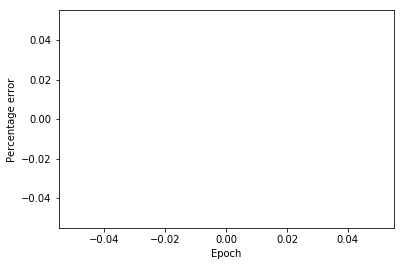

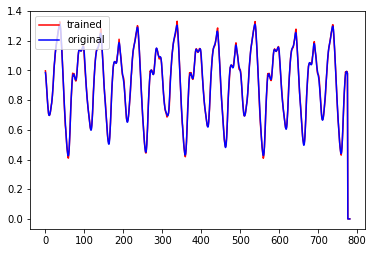

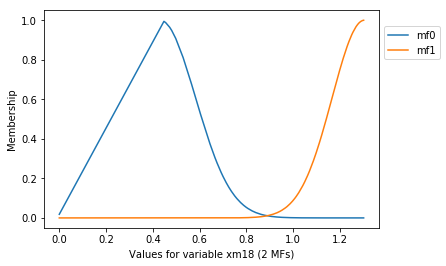

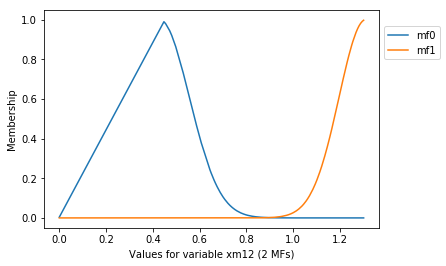

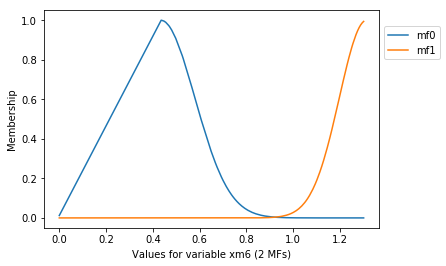

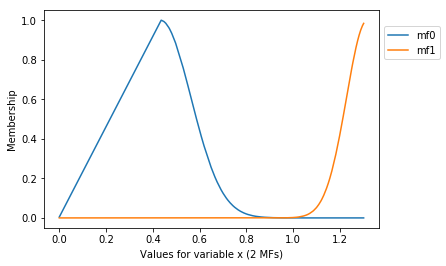

### Testing for 183 cases
MS error=0.00008, RMS error=0.00919, percentage=inf%


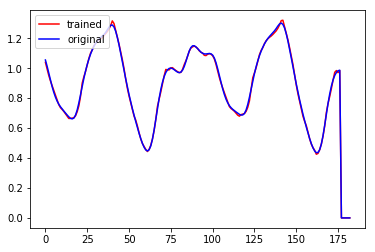

In [6]:
def model_serie():
    invardefs = [
            ('xm18', make_gauss_mfs(0.1, [0.425606, 1.313696])),
            ('xm12', make_gauss_mfs(0.1, [0.425606, 1.313696])),
            ('xm6',  make_gauss_mfs(0.1, [0.425606, 1.313696])),
            ('x',    make_gauss_mfs(0.1, [0.425606, 1.313696])),
            ]
    outvars = ['xp6']
    model = anfis.AnfisNet('model_define', invardefs, outvars)
    return model


def our_data(data):
    num_cases = len(data) - 18
    x = torch.zeros((num_cases, 4))
    y = torch.zeros((num_cases, 1))
    for t in range(18, len(data)-6):
            values = [data[t-18],data[t-12],data[t-6],data[t],data[t+6]]
            x[t-18] = torch.tensor(values[0:4])
            y[t-18] = values[4]
    dl = DataLoader(TensorDataset(x, y), batch_size=1024, shuffle=True)
    return dl


model = model_serie()
train_data = our_data(x_train)
train_anfis(model, train_data, 100, True)
test_data = our_data(x_test)
test_anfis(model, test_data, True)


5